<a href="https://colab.research.google.com/github/FernandoRodriguesDeSantana/ML_py/blob/main/second_ml_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**My second machine learning project**

## **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## **Dataset**

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class" ]
df = pd.read_csv('https://raw.githubusercontent.com/FernandoRodriguesDeSantana/ml_data/main/magic04.csv?token=GHSAT0AAAAAACEAV5LZ3LFCPZGQZTHWAHOAZFVM3WA', names = cols)
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique()

#A função .unique() irá mostrar os valores presentes na coluna 'class'
#Para que o computador entenda melhor o valor 'g' será representado por
#0 enquanto que o valor 'h' será representado por 1. Portanto:
df['class'] = (df['class'] == 'g').astype(int)

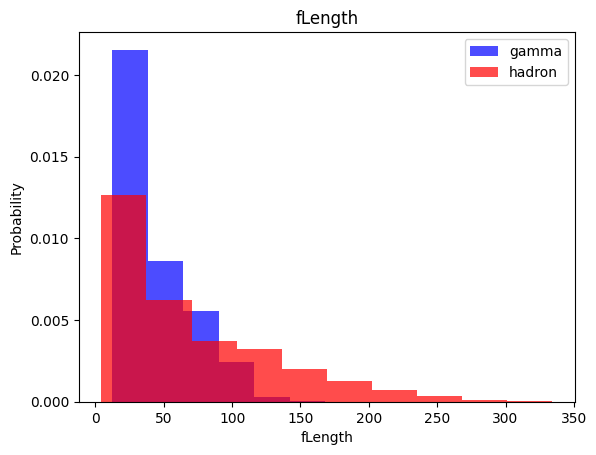

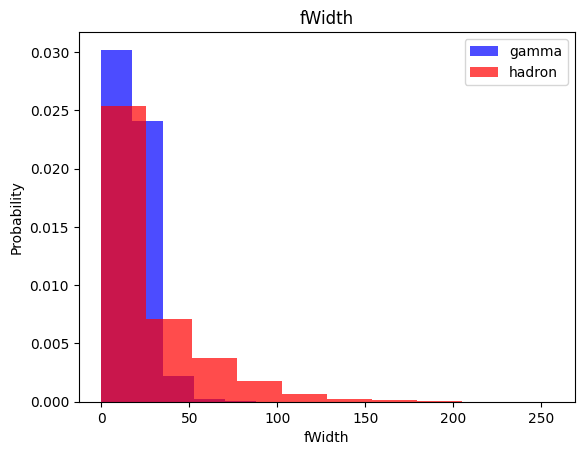

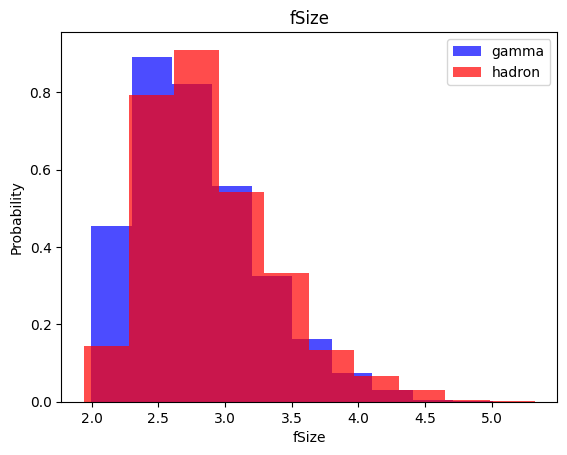

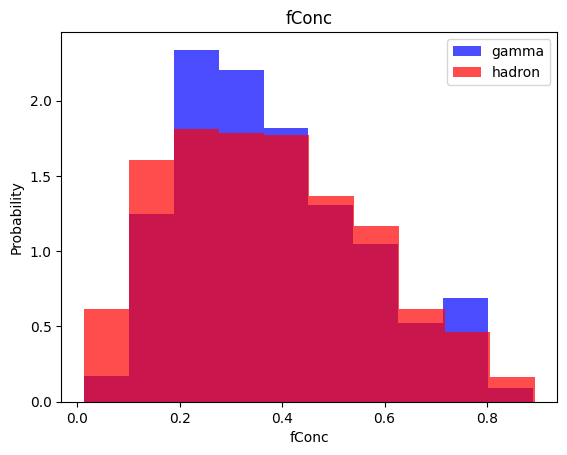

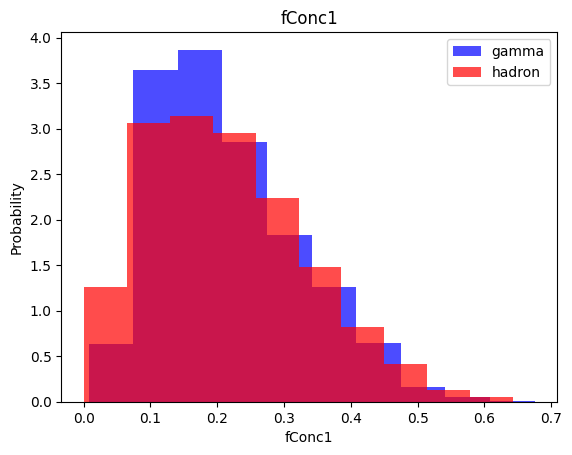

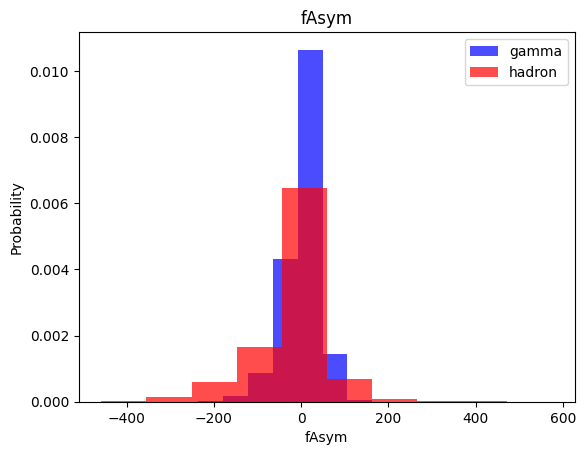

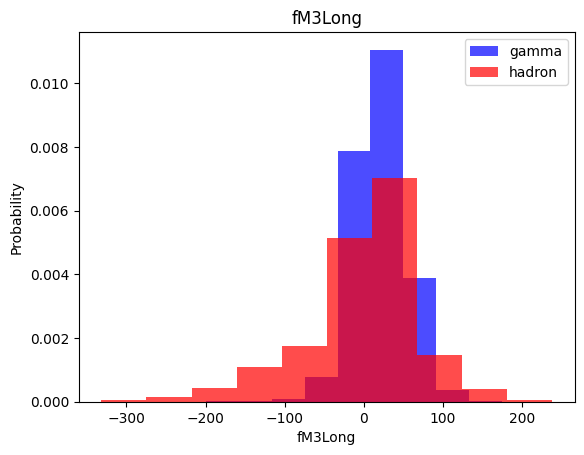

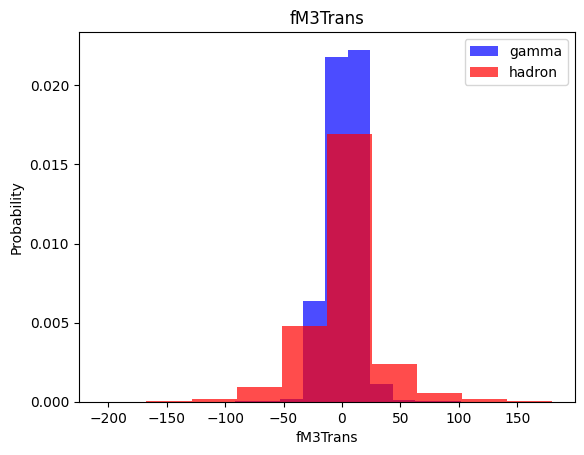

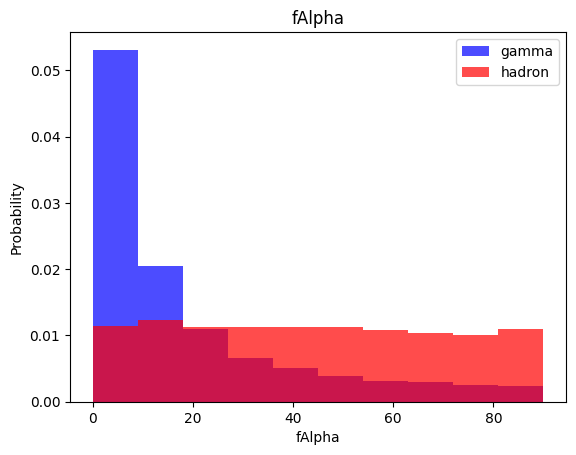

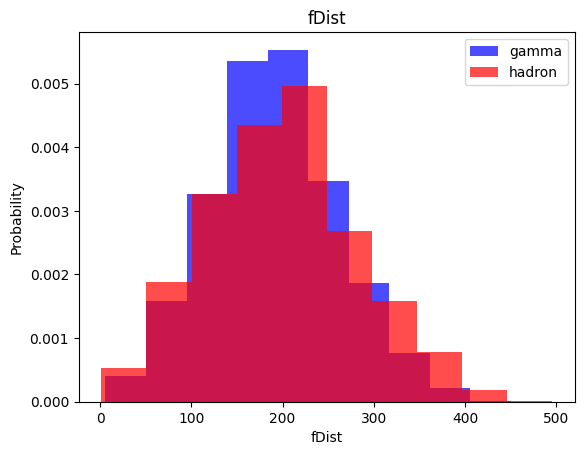

In [4]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## **Train, validation, test datasets**

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#'.sample' está pegando uma amostra embaralhada dentre 100% da base de dados, já que frac=1
#'[int(0.6*len(df))] está selecionando os dados pertencentes a 'df' de 0% a 60% -> Treinamento
#'[int(0.8*len(df))] está selecionando os dados pertencentes a 'df' de 80% a 100% -> Teste
# dados que estão entre 60% e 80% da amostra servirão para validação do modelo

In [6]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1))))
  #'hstack' serve para alinhar horizontalmente o array X com o array y.
  #Como X é um array BIdimensional e y é um array UNIdimensional é necessário
  #remodelar (reshape) y para se tornar um array BIdimensional

  return data, X, y

In [7]:
#print(len(train[train["class"]==1])) #quantidade de elementos gamma
#print(len(train[train["class"]==0])) #quantidade de elementos hadron

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [9]:
sum(y_train == 1)

7405

In [10]:
sum(y_train == 0)

7405

In [11]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

## **KNN**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1331
           1       0.84      0.88      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



##**Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [17]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



## **Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1331
           1       0.85      0.82      0.83      2473

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## **Support Vector Machines (SVM's)**

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [23]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1331
           1       0.89      0.89      0.89      2473

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## **Neural Network**

In [24]:
import tensorflow as tf

In [25]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [27]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


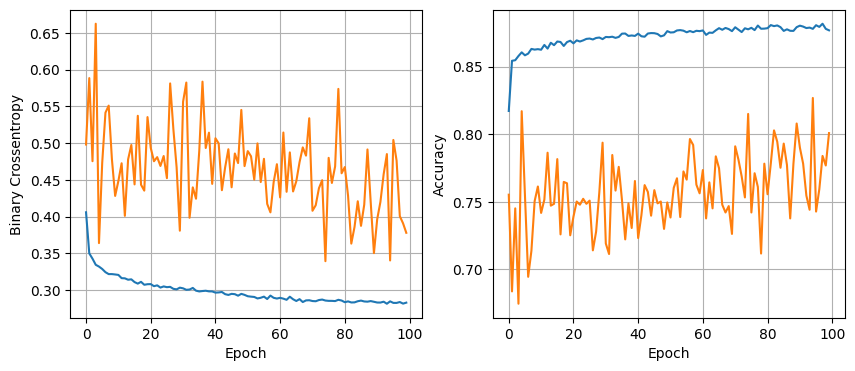

154/154 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8574
16 nodes, dropout 0, lr 0.01, batch size 64


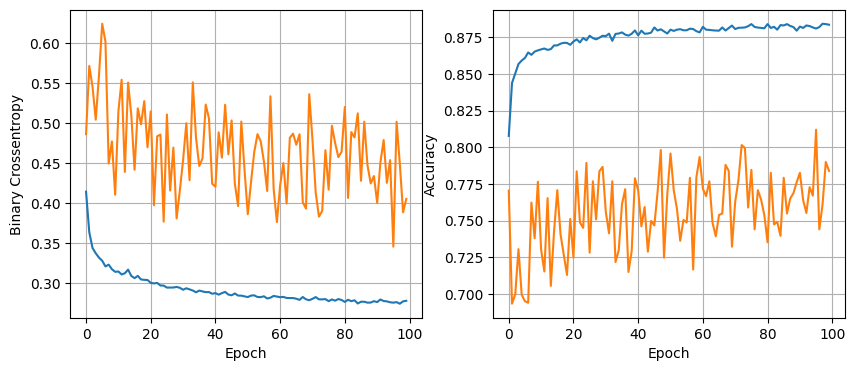

154/154 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8649
16 nodes, dropout 0, lr 0.01, batch size 128


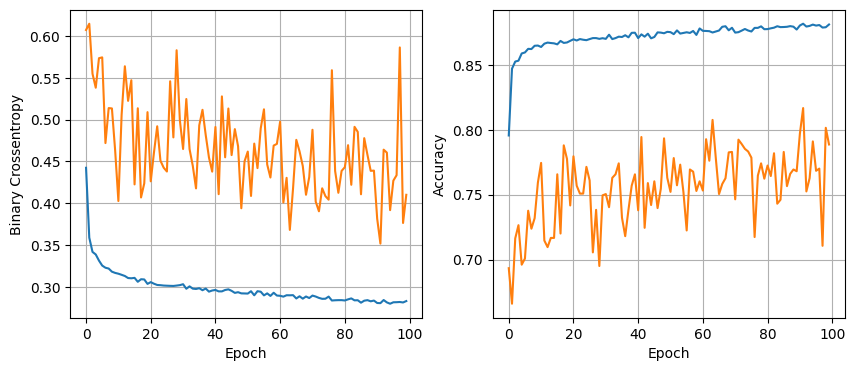

154/154 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8466
16 nodes, dropout 0, lr 0.005, batch size 32


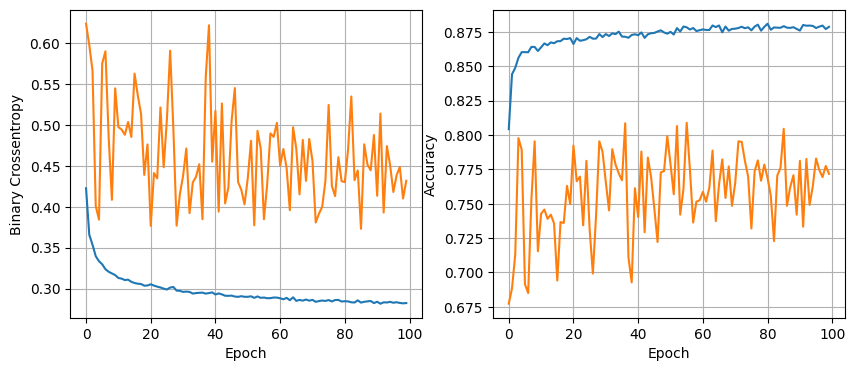

154/154 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8551
16 nodes, dropout 0, lr 0.005, batch size 64


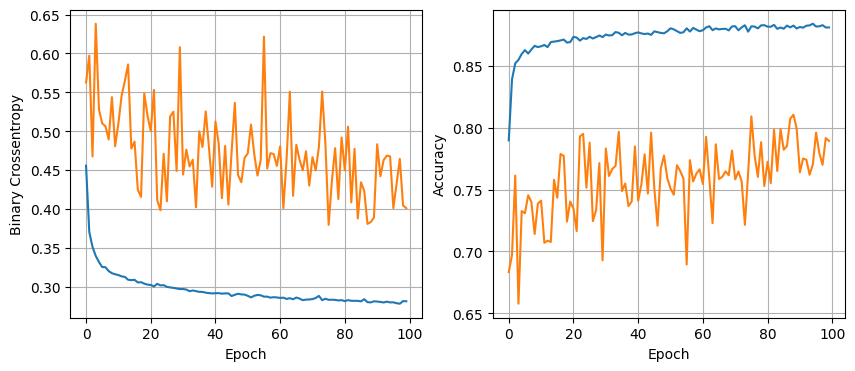

154/154 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8515
16 nodes, dropout 0, lr 0.005, batch size 128


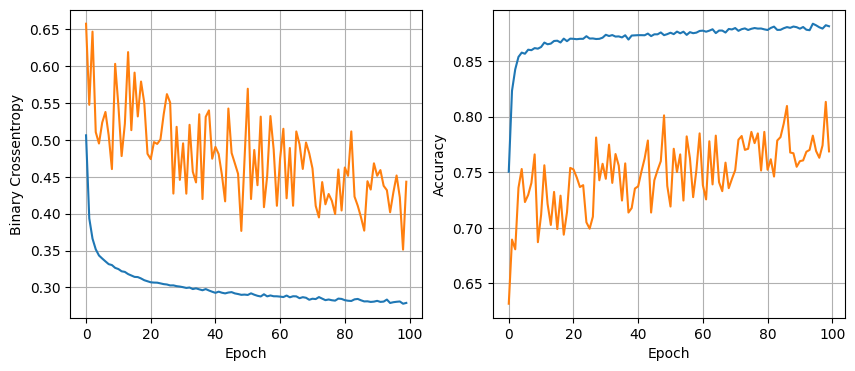

154/154 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8515
16 nodes, dropout 0, lr 0.001, batch size 32


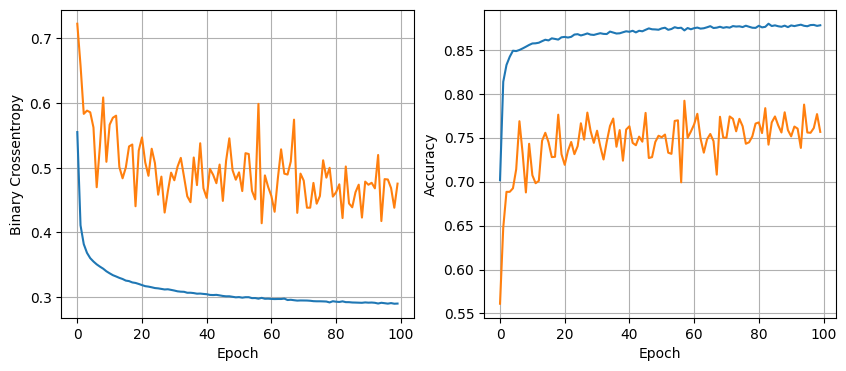

154/154 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8533
16 nodes, dropout 0, lr 0.001, batch size 64


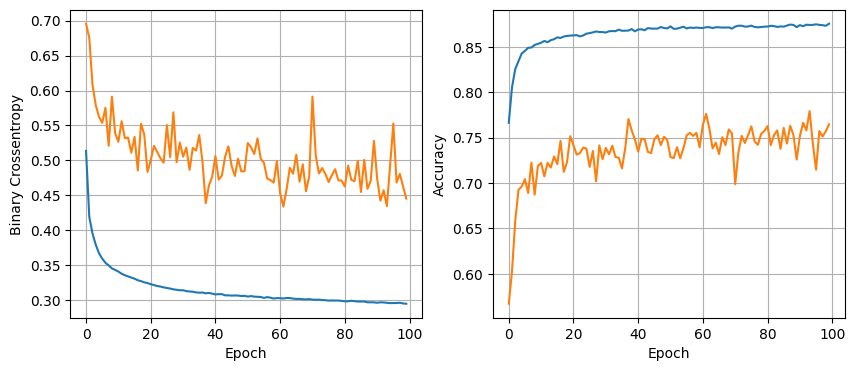

154/154 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8582
16 nodes, dropout 0, lr 0.001, batch size 128


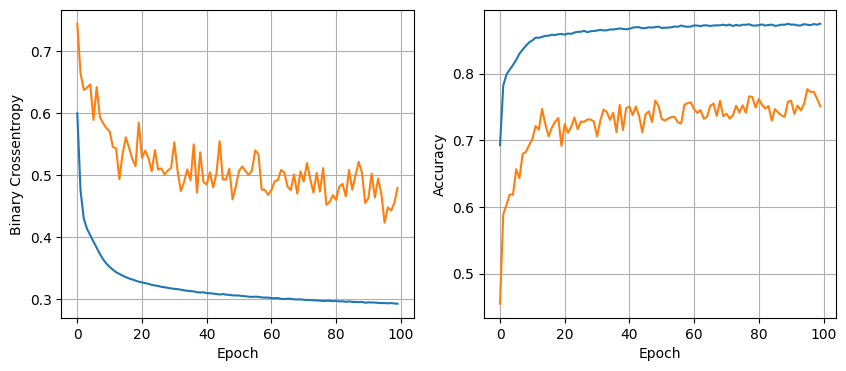

154/154 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8535
16 nodes, dropout 0.2, lr 0.01, batch size 32


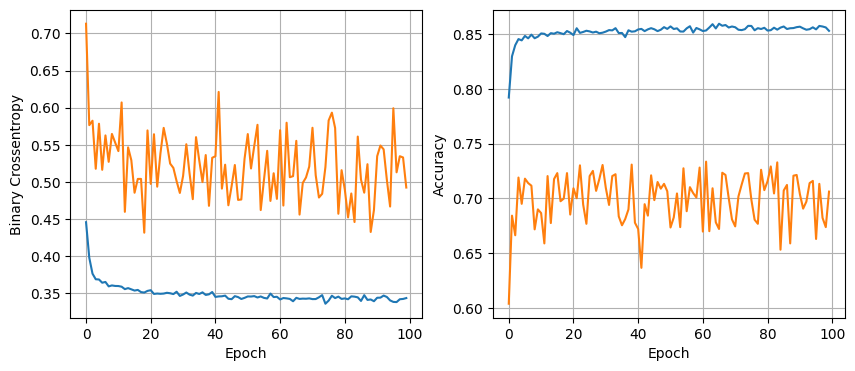

154/154 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8476
16 nodes, dropout 0.2, lr 0.01, batch size 64


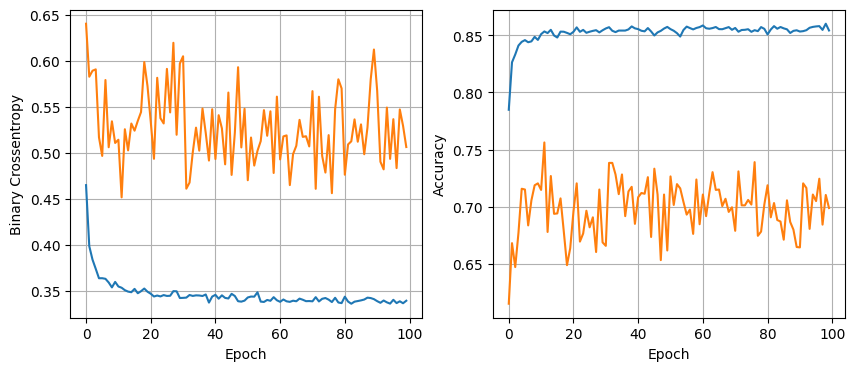

154/154 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8439
16 nodes, dropout 0.2, lr 0.01, batch size 128


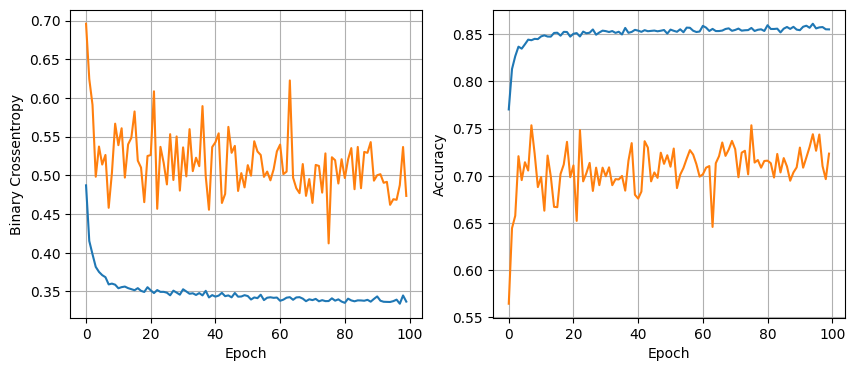

154/154 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8431
16 nodes, dropout 0.2, lr 0.005, batch size 32


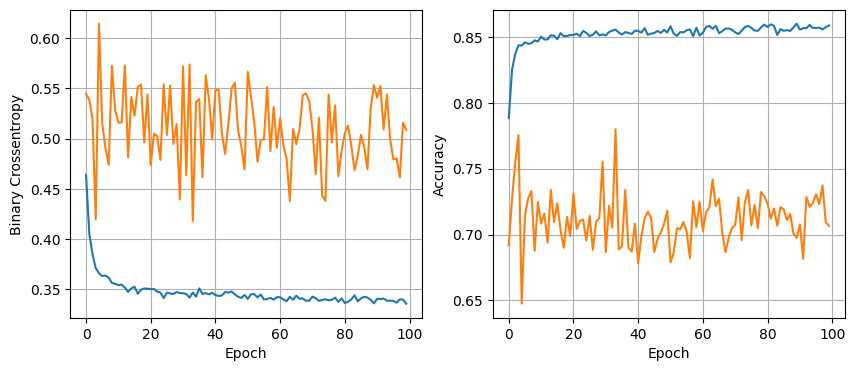

154/154 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8429
16 nodes, dropout 0.2, lr 0.005, batch size 64


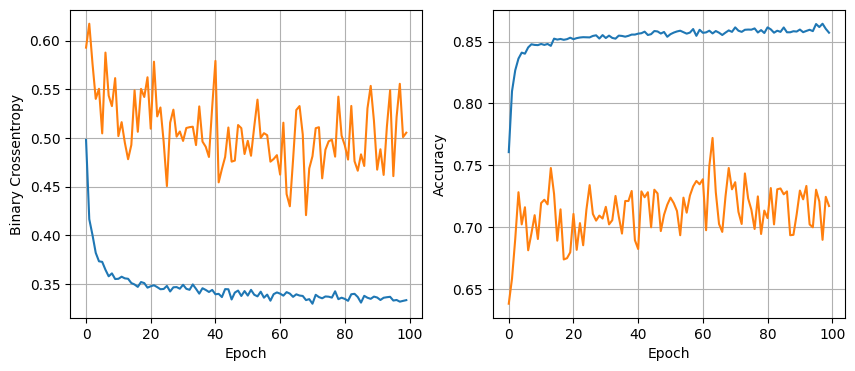

154/154 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8490
16 nodes, dropout 0.2, lr 0.005, batch size 128


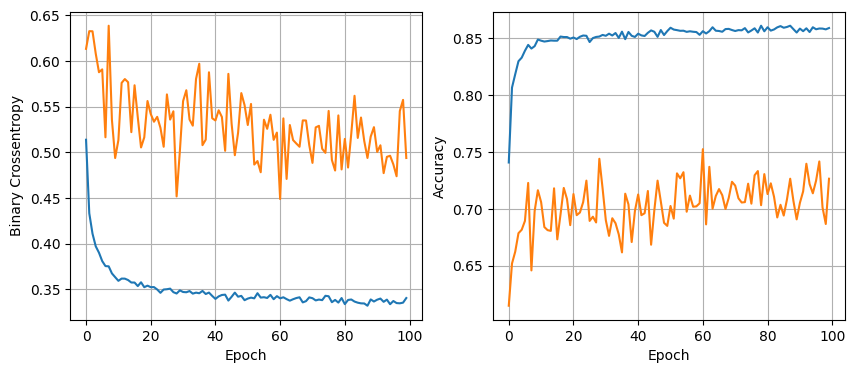

154/154 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8480
16 nodes, dropout 0.2, lr 0.001, batch size 32


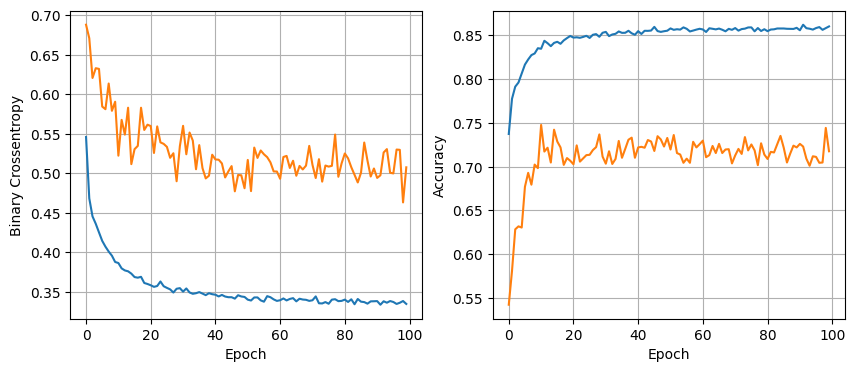

154/154 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8405
16 nodes, dropout 0.2, lr 0.001, batch size 64


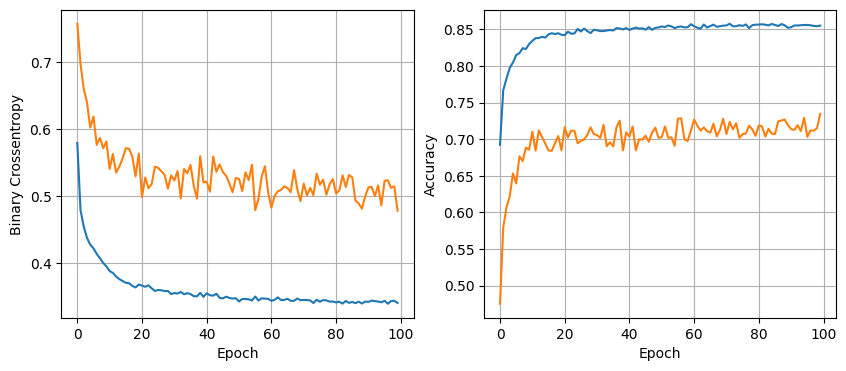

154/154 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8494
16 nodes, dropout 0.2, lr 0.001, batch size 128


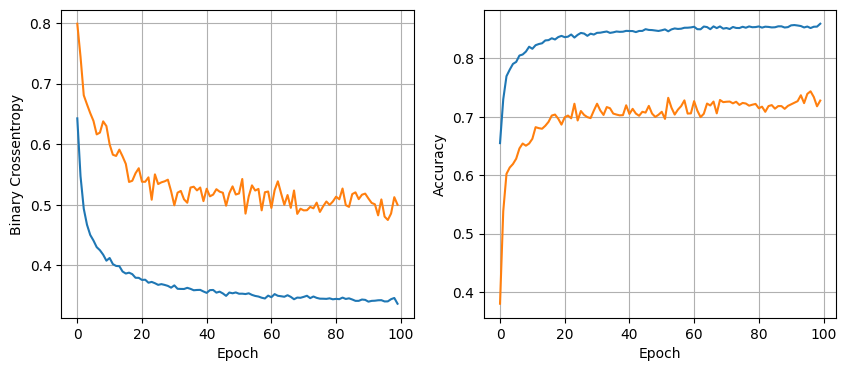

154/154 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8488
32 nodes, dropout 0, lr 0.01, batch size 32


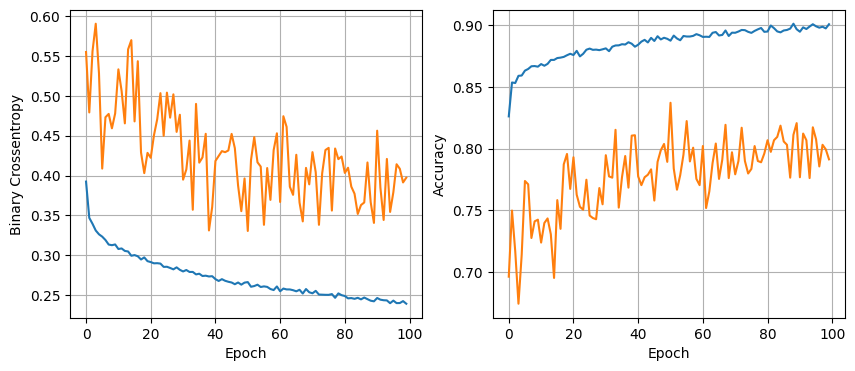

154/154 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8437
32 nodes, dropout 0, lr 0.01, batch size 64


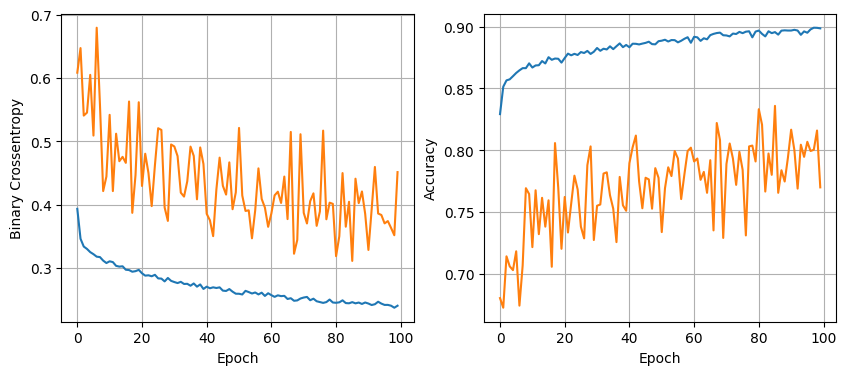

154/154 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8525
32 nodes, dropout 0, lr 0.01, batch size 128


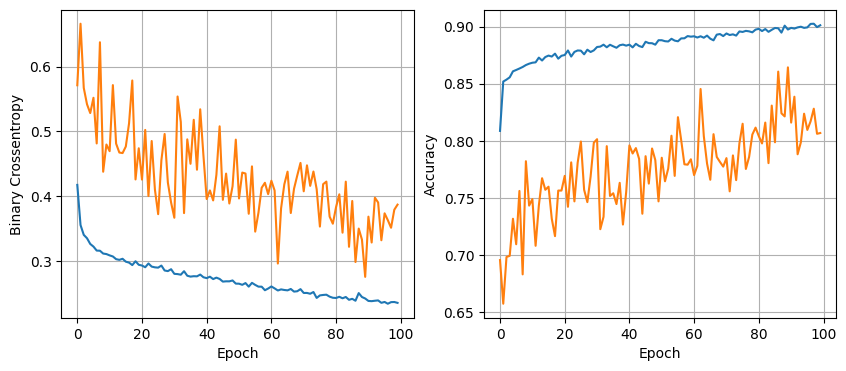

154/154 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8545
32 nodes, dropout 0, lr 0.005, batch size 32


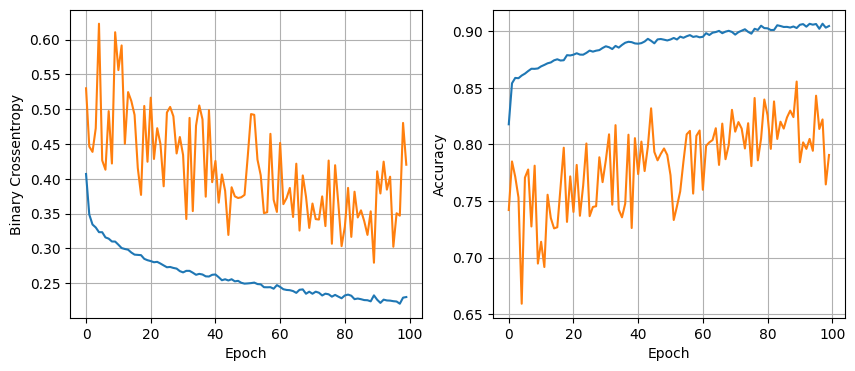

154/154 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8468
32 nodes, dropout 0, lr 0.005, batch size 64


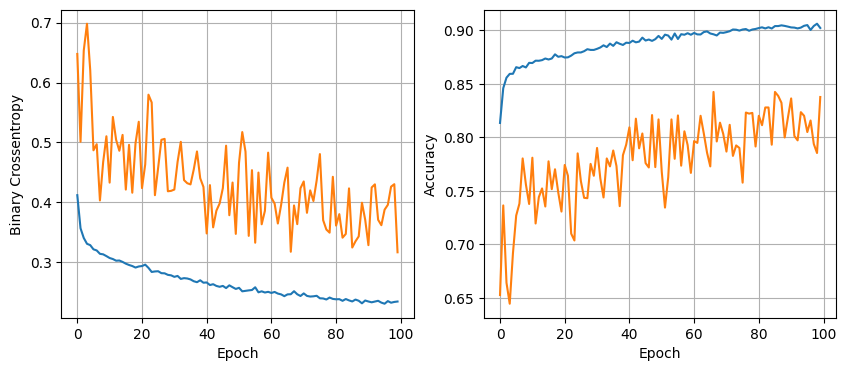

154/154 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8474
32 nodes, dropout 0, lr 0.005, batch size 128


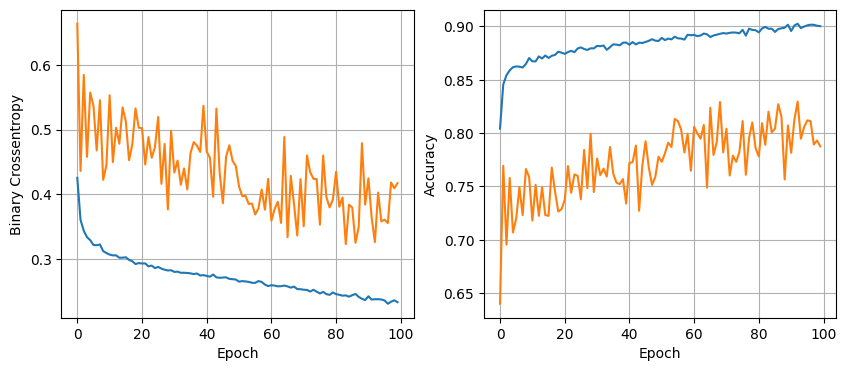

154/154 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8476
32 nodes, dropout 0, lr 0.001, batch size 32


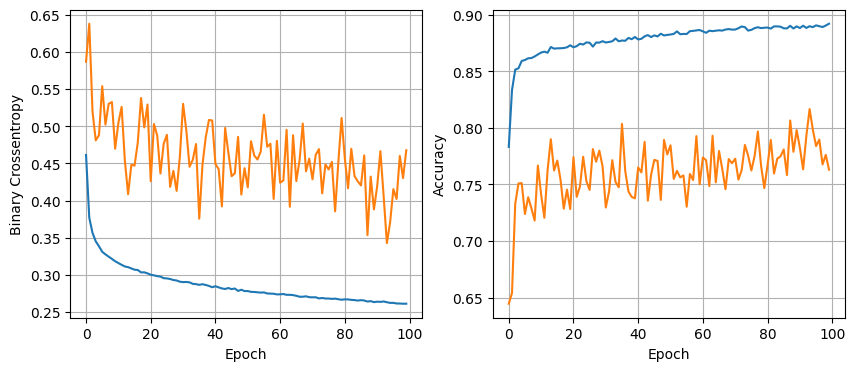

154/154 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8549
32 nodes, dropout 0, lr 0.001, batch size 64


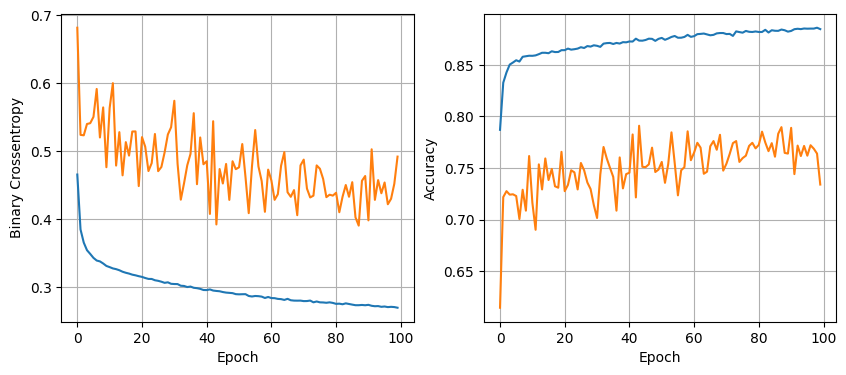

154/154 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8537
32 nodes, dropout 0, lr 0.001, batch size 128


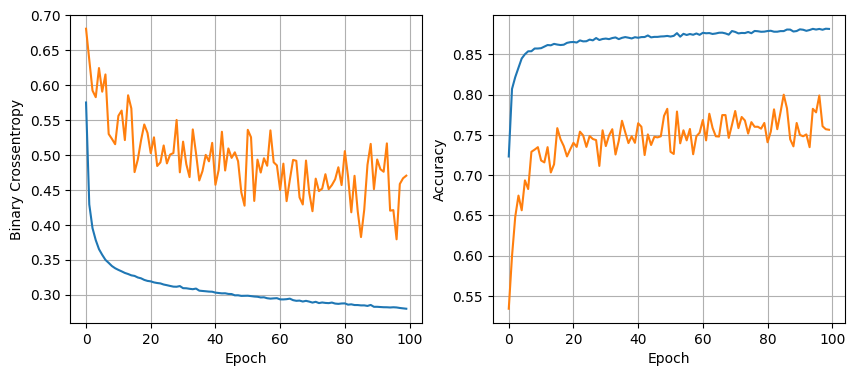

154/154 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8568
32 nodes, dropout 0.2, lr 0.01, batch size 32


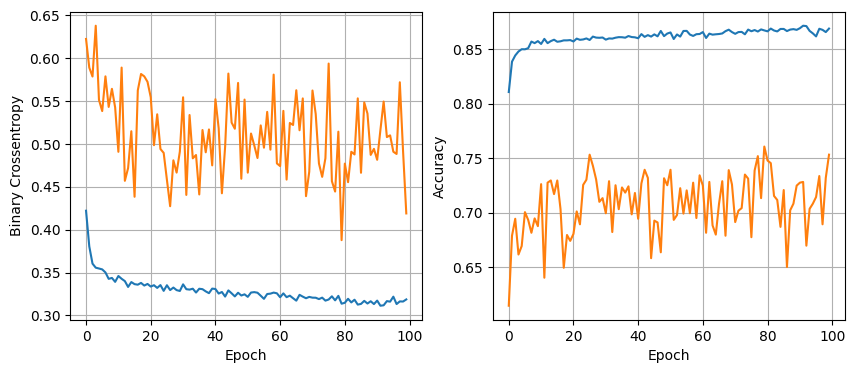

154/154 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8449
32 nodes, dropout 0.2, lr 0.01, batch size 64


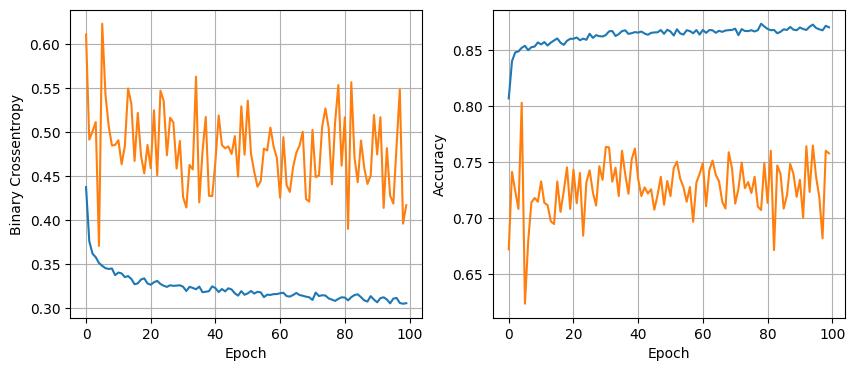

154/154 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8504
32 nodes, dropout 0.2, lr 0.01, batch size 128


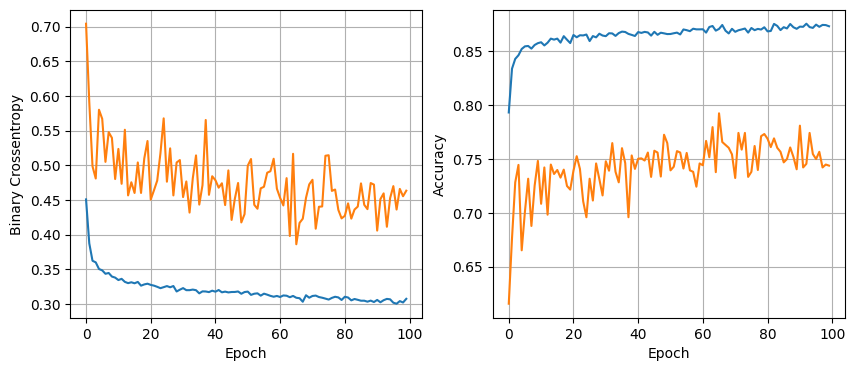

154/154 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8509
32 nodes, dropout 0.2, lr 0.005, batch size 32


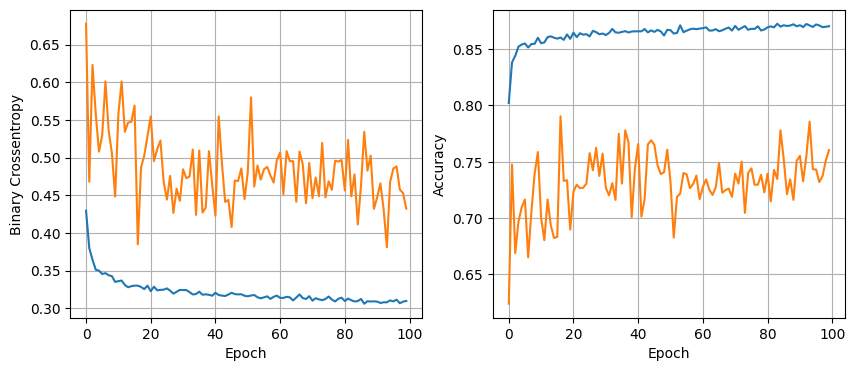

154/154 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8584
32 nodes, dropout 0.2, lr 0.005, batch size 64


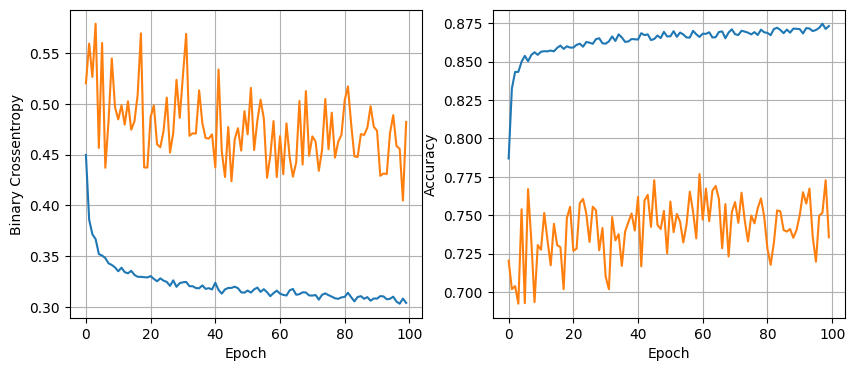

154/154 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8504
32 nodes, dropout 0.2, lr 0.005, batch size 128


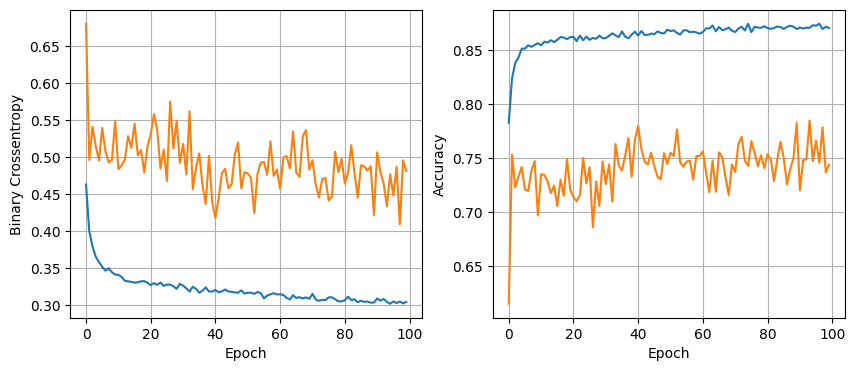

154/154 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8517
32 nodes, dropout 0.2, lr 0.001, batch size 32


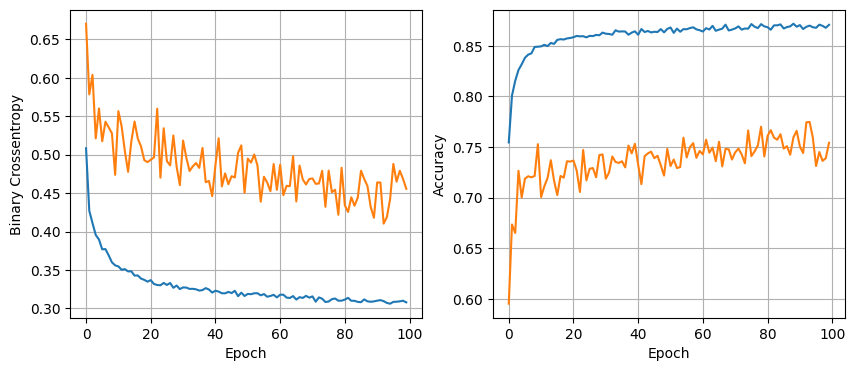

154/154 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8602
32 nodes, dropout 0.2, lr 0.001, batch size 64


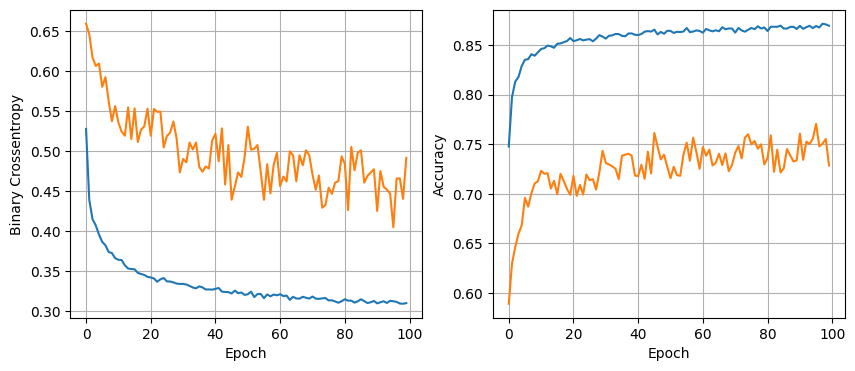

154/154 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8564
32 nodes, dropout 0.2, lr 0.001, batch size 128


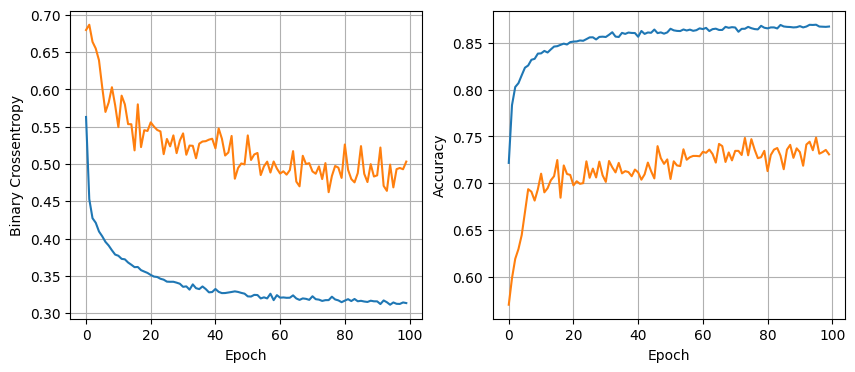

154/154 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.01, batch size 32


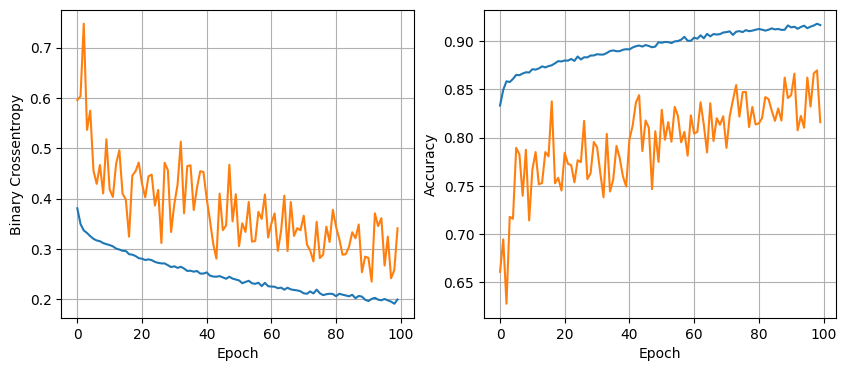

154/154 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8313
64 nodes, dropout 0, lr 0.01, batch size 64


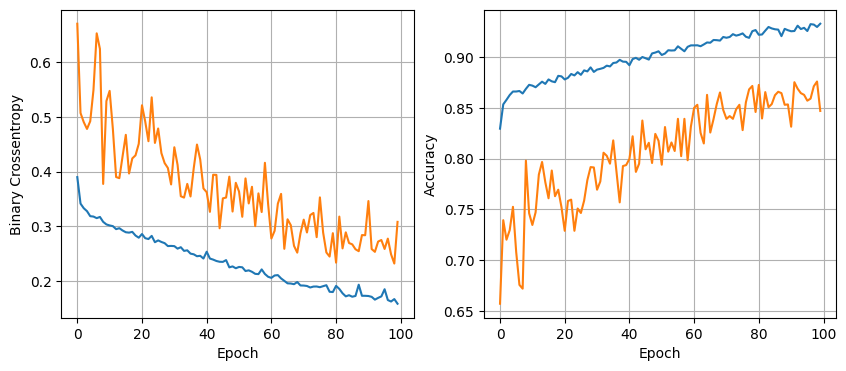

154/154 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8433
64 nodes, dropout 0, lr 0.01, batch size 128


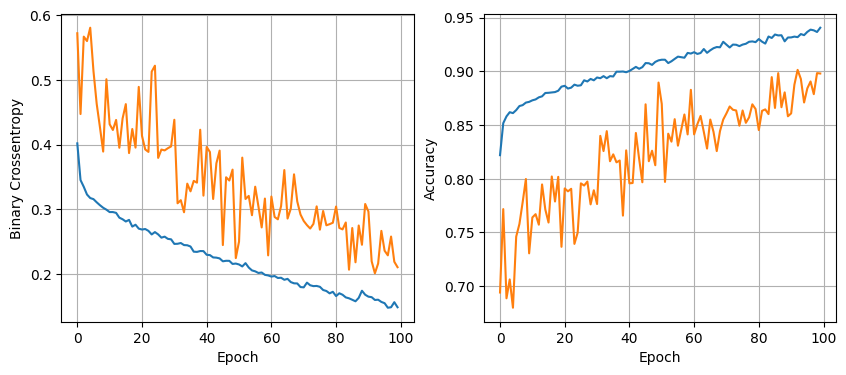

154/154 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.8460
64 nodes, dropout 0, lr 0.005, batch size 32


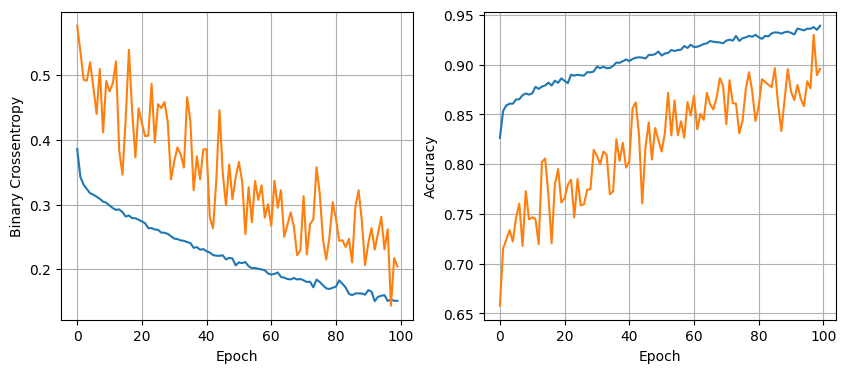

154/154 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8423
64 nodes, dropout 0, lr 0.005, batch size 64


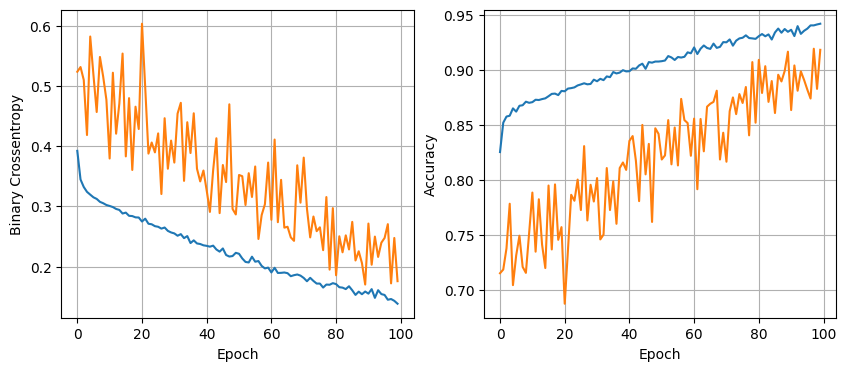

154/154 [==============================] - 1s 3ms/step - loss: 0.5537 - accuracy: 0.8380
64 nodes, dropout 0, lr 0.005, batch size 128


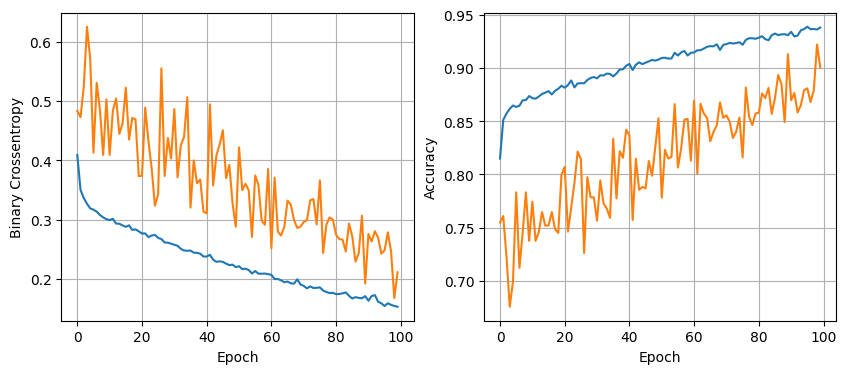

154/154 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.8311
64 nodes, dropout 0, lr 0.001, batch size 32


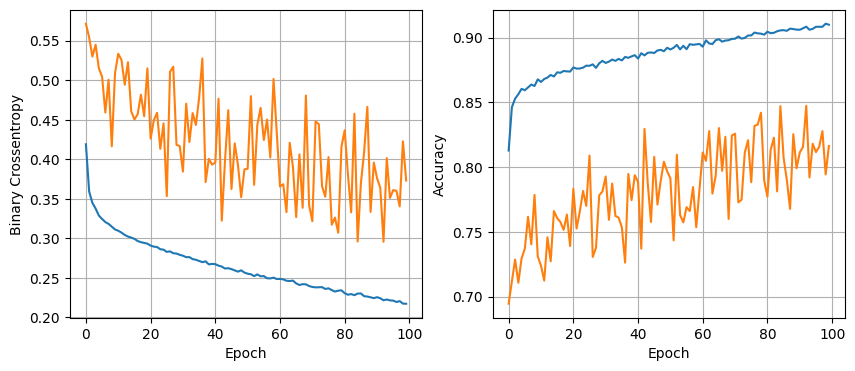

154/154 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8533
64 nodes, dropout 0, lr 0.001, batch size 64


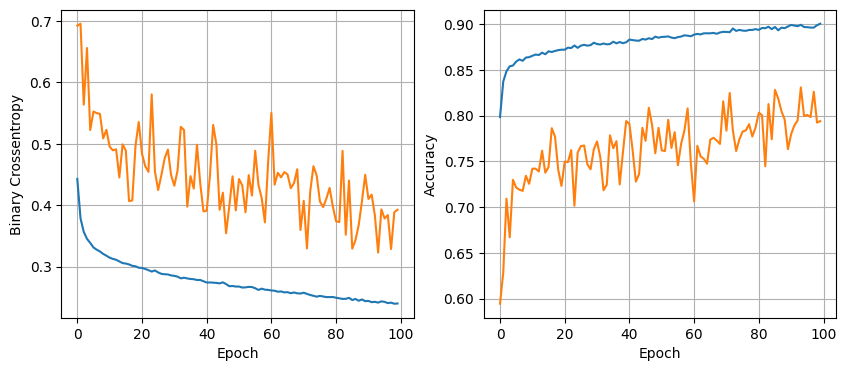

154/154 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8580
64 nodes, dropout 0, lr 0.001, batch size 128


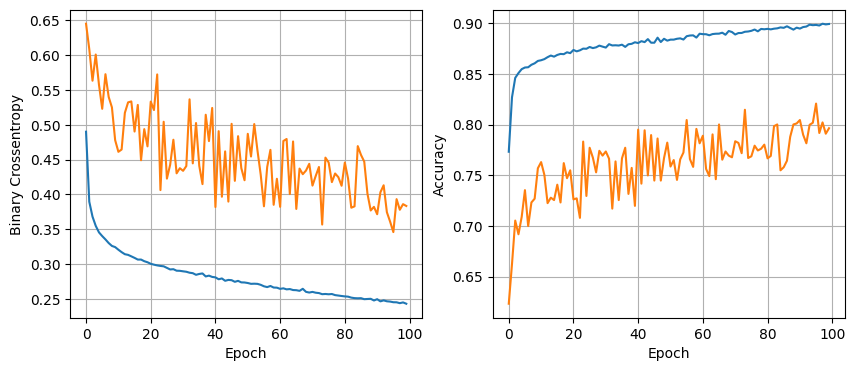

154/154 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8572
64 nodes, dropout 0.2, lr 0.01, batch size 32


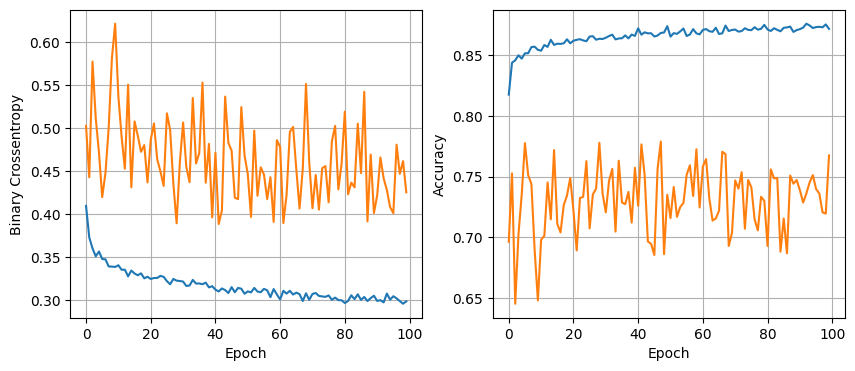

154/154 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8610
64 nodes, dropout 0.2, lr 0.01, batch size 64


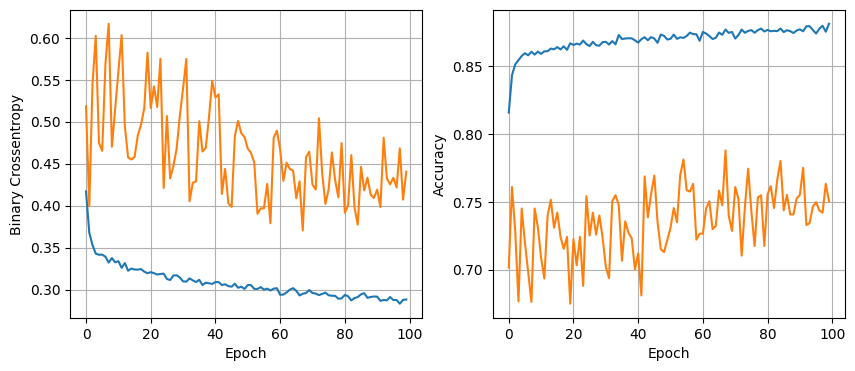

154/154 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8553
64 nodes, dropout 0.2, lr 0.01, batch size 128


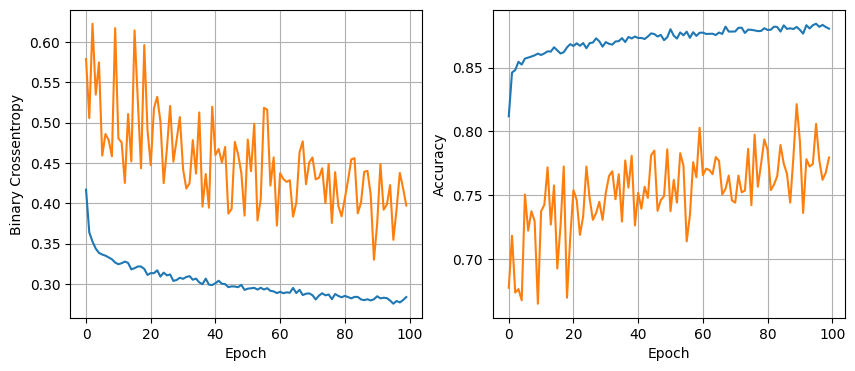

154/154 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8490
64 nodes, dropout 0.2, lr 0.005, batch size 32


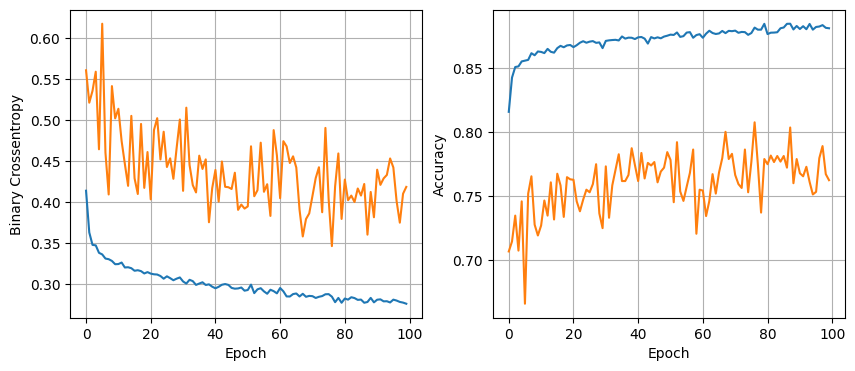

154/154 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8590
64 nodes, dropout 0.2, lr 0.005, batch size 64


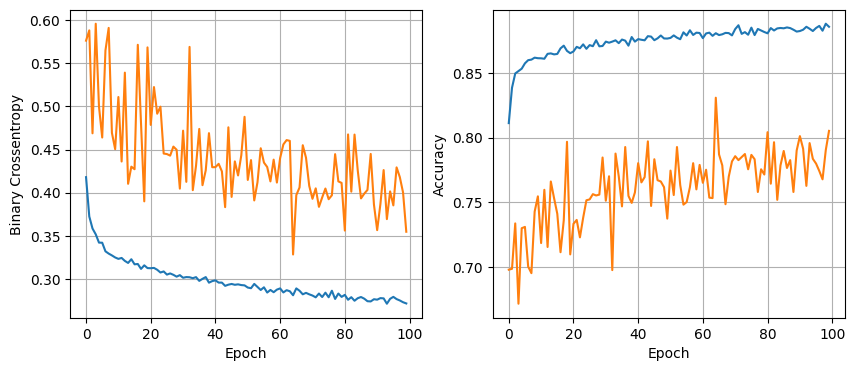

154/154 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8663
64 nodes, dropout 0.2, lr 0.005, batch size 128


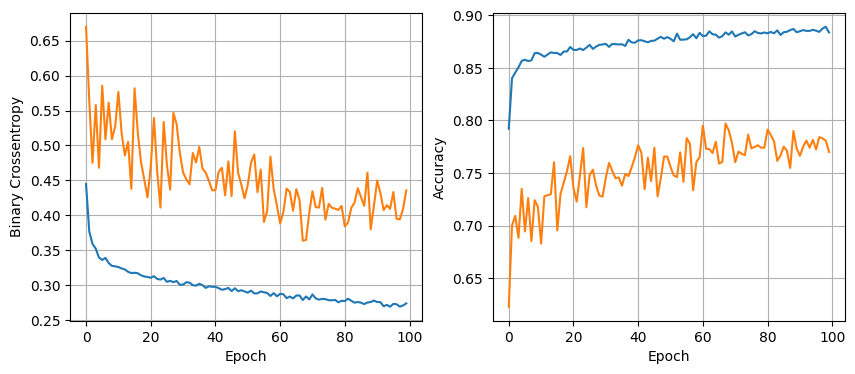

154/154 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8541
64 nodes, dropout 0.2, lr 0.001, batch size 32


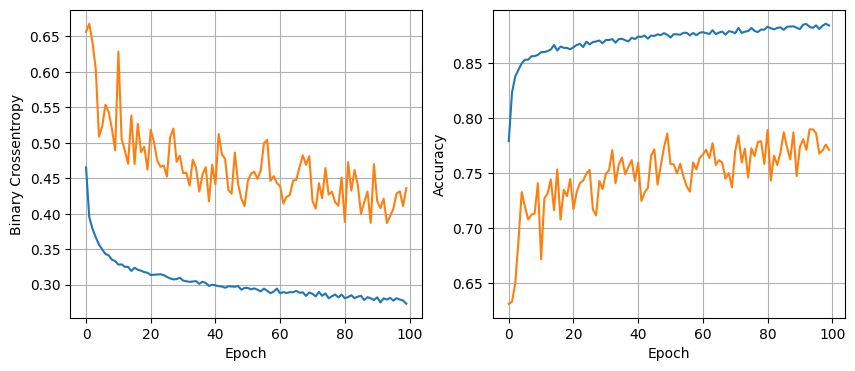

154/154 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8625
64 nodes, dropout 0.2, lr 0.001, batch size 64


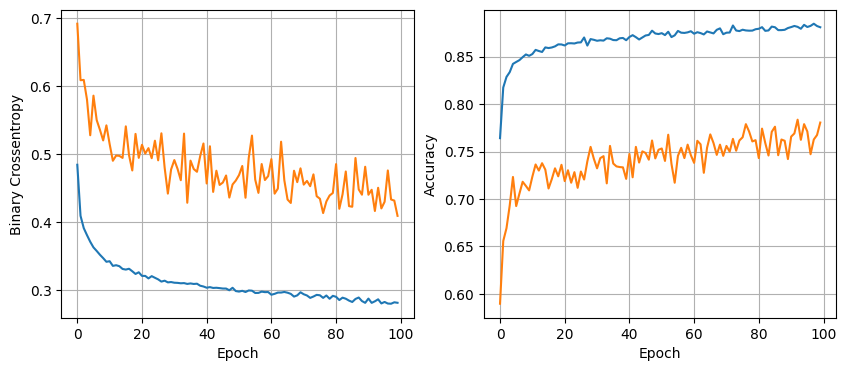

154/154 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8621
64 nodes, dropout 0.2, lr 0.001, batch size 128


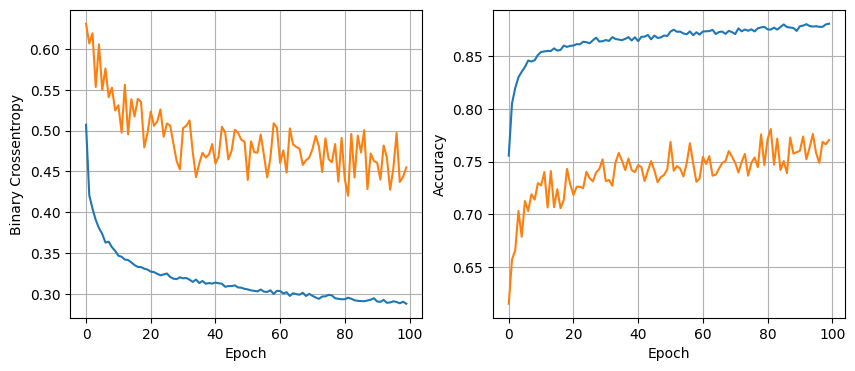

154/154 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8596


In [28]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [29]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 6ms/step


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1331
           1       0.88      0.93      0.90      2473

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

